In [3]:
import pandas as pd


In [4]:
#Load the data
energy = pd.read_csv("C:\\Users\\LENOVO\\PycharmProjects\\ML_OPS\\ML_OPS_test\\data\\energy_data.csv")
sensor_data = pd.read_csv("C:\\Users\\LENOVO\\PycharmProjects\\ML_OPS\\ML_OPS_test\\data\\sensor_data.csv")
weather = pd.read_csv('C:\\Users\\LENOVO\\PycharmProjects\\ML_OPS\\ML_OPS_test\\data\\/weather_data.csv')

In [5]:
# Convert timestamps to datetime format
energy['timestamp'] = pd.to_datetime(energy['timestamp']).dt.tz_localize('UTC')
sensor_data['timestamp'] = pd.to_datetime(sensor_data['timestamp']).dt.tz_convert('UTC')
weather['timestamp'] = pd.to_datetime(weather['timestamp']).dt.tz_localize('UTC')

print(energy['timestamp'].unique())
print(sensor_data['timestamp'].unique())
print(weather['timestamp'].unique())


<DatetimeArray>
['2024-09-25 00:00:00+00:00', '2024-09-25 00:10:00+00:00',
 '2024-09-25 00:20:00+00:00', '2024-09-25 00:30:00+00:00',
 '2024-09-25 00:40:00+00:00', '2024-09-25 00:50:00+00:00',
 '2024-09-25 01:00:00+00:00', '2024-09-25 01:10:00+00:00',
 '2024-09-25 01:20:00+00:00', '2024-09-25 01:30:00+00:00',
 ...
 '2024-10-24 22:30:00+00:00', '2024-10-24 22:40:00+00:00',
 '2024-10-24 22:50:00+00:00', '2024-10-24 23:00:00+00:00',
 '2024-10-24 23:10:00+00:00', '2024-10-24 23:20:00+00:00',
 '2024-10-24 23:30:00+00:00', '2024-10-24 23:40:00+00:00',
 '2024-10-24 23:50:00+00:00', '2024-10-25 00:00:00+00:00']
Length: 4321, dtype: datetime64[ns, UTC]
<DatetimeArray>
['2024-09-25 11:50:00+00:00', '2024-09-25 12:00:00+00:00',
 '2024-09-25 12:10:00+00:00', '2024-09-25 12:20:00+00:00',
 '2024-09-25 12:30:00+00:00', '2024-09-25 12:40:00+00:00',
 '2024-09-25 12:50:00+00:00', '2024-09-25 13:00:00+00:00',
 '2024-09-25 13:10:00+00:00', '2024-09-25 13:20:00+00:00',
 ...
 '2024-09-28 08:40:00+00:00', '2

In [6]:
# Merge data based on 'timestamp' column (assuming an outer join to include all data)
merged_data = pd.merge(energy, sensor_data, on='timestamp', how='outer')
merged_data = pd.merge(merged_data, weather, on='timestamp', how='outer')


In [7]:
# Optional: Fill missing values (e.g., forward fill or zero fill, depending on the use case)
merged_data.fillna(method='ffill', inplace=True)  # forward fill as an example
# merged_data.fillna(0, inplace=True)  # zero fill example

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8300\2545530047.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)  # forward fill as an example


In [8]:
print(merged_data.head(100))

# Save the merged data to a new CSV
merged_data.to_csv('merged_data.csv', index=False)

                   timestamp  building_energy_consumption_kwh  \
0  2024-09-25 00:00:00+00:00                         4.996654   
1  2024-09-25 00:10:00+00:00                         5.345860   
2  2024-09-25 00:20:00+00:00                         5.428626   
3  2024-09-25 00:30:00+00:00                         7.965427   
4  2024-09-25 00:40:00+00:00                         5.677612   
..                       ...                              ...   
95 2024-09-25 11:50:00+00:00                        22.448948   
96 2024-09-25 11:50:00+00:00                        22.448948   
97 2024-09-25 11:50:00+00:00                        22.448948   
98 2024-09-25 11:50:00+00:00                        22.448948   
99 2024-09-25 11:50:00+00:00                        22.448948   

              tags_name   site_id  RelativeHumidity  Temperature  \
0                   NaN       NaN               NaN          NaN   
1                   NaN       NaN               NaN          NaN   
2              

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Handling missing values for Relative Humidity
reg = LinearRegression()

# Training data: where Relative Humidity is not missing
not_missing_mask = merged_data['RelativeHumidity'].notna()
X_train = merged_data.loc[not_missing_mask, ['building_energy_consumption_kwh']].values.reshape(-1, 1)
y_train = merged_data.loc[not_missing_mask, 'RelativeHumidity'].values

# Fit regression model
reg.fit(X_train, y_train)

# Predict missing Relative Humidity values
missing_mask = merged_data['RelativeHumidity'].isna()
X_pred = merged_data.loc[missing_mask, ['building_energy_consumption_kwh']].values.reshape(-1, 1)
merged_data.loc[missing_mask, 'RelativeHumidity'] = reg.predict(X_pred)

# Repeat the process for Temperature
reg = LinearRegression()

# Training data: where Temperature is not missing
not_missing_mask = merged_data['Temperature'].notna()
X_train = merged_data.loc[not_missing_mask, ['building_energy_consumption_kwh']].values.reshape(-1, 1)
y_train = merged_data.loc[not_missing_mask, 'Temperature'].values

# Fit regression model
reg.fit(X_train, y_train)

# Predict missing Temperature values
missing_mask = merged_data['Temperature'].isna()
X_pred = merged_data.loc[missing_mask, ['building_energy_consumption_kwh']].values.reshape(-1, 1)
merged_data.loc[missing_mask, 'Temperature'] = reg.predict(X_pred)\

# merged_data['site_id'] = merged_data['Area'].fillna('UnknownArea1')
# merged_data['tags_name'] = merged_data['tags_name'].fillna('UnknownTag')


In [10]:
print(merged_data.head(100))

# # Save the merged data to a new CSV
# merged_data.to_csv('merged_data.csv', index=False)

                   timestamp  building_energy_consumption_kwh  \
0  2024-09-25 00:00:00+00:00                         4.996654   
1  2024-09-25 00:10:00+00:00                         5.345860   
2  2024-09-25 00:20:00+00:00                         5.428626   
3  2024-09-25 00:30:00+00:00                         7.965427   
4  2024-09-25 00:40:00+00:00                         5.677612   
..                       ...                              ...   
95 2024-09-25 11:50:00+00:00                        22.448948   
96 2024-09-25 11:50:00+00:00                        22.448948   
97 2024-09-25 11:50:00+00:00                        22.448948   
98 2024-09-25 11:50:00+00:00                        22.448948   
99 2024-09-25 11:50:00+00:00                        22.448948   

              tags_name   site_id  RelativeHumidity  Temperature  \
0                   NaN       NaN          0.706666    21.983534   
1                   NaN       NaN          0.706376    21.962386   
2              

In [11]:
# Handle both missing values and empty brackets
merged_data['site_id'] = merged_data['site_id'].replace('[]', '["Unknown Area 2"]').fillna('["Unknown Area 1"]')
merged_data['tags_name'] = merged_data['tags_name'].fillna('UnknownTag')


In [12]:
print(merged_data.head(100))

# # Save the merged data to a new CSV
# merged_data.to_csv('merged_data.csv', index=False)

                   timestamp  building_energy_consumption_kwh  \
0  2024-09-25 00:00:00+00:00                         4.996654   
1  2024-09-25 00:10:00+00:00                         5.345860   
2  2024-09-25 00:20:00+00:00                         5.428626   
3  2024-09-25 00:30:00+00:00                         7.965427   
4  2024-09-25 00:40:00+00:00                         5.677612   
..                       ...                              ...   
95 2024-09-25 11:50:00+00:00                        22.448948   
96 2024-09-25 11:50:00+00:00                        22.448948   
97 2024-09-25 11:50:00+00:00                        22.448948   
98 2024-09-25 11:50:00+00:00                        22.448948   
99 2024-09-25 11:50:00+00:00                        22.448948   

              tags_name             site_id  RelativeHumidity  Temperature  \
0            UnknownTag  ["Unknown Area 1"]          0.706666    21.983534   
1            UnknownTag  ["Unknown Area 1"]          0.706376  

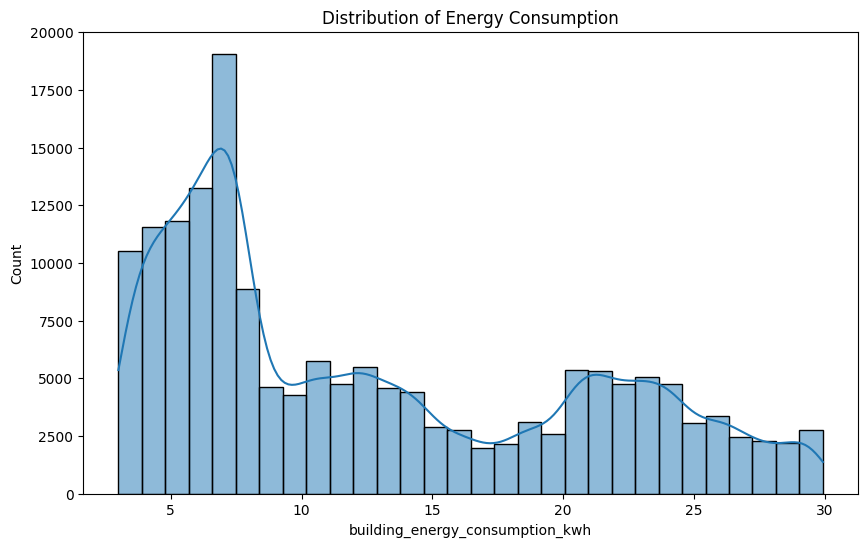

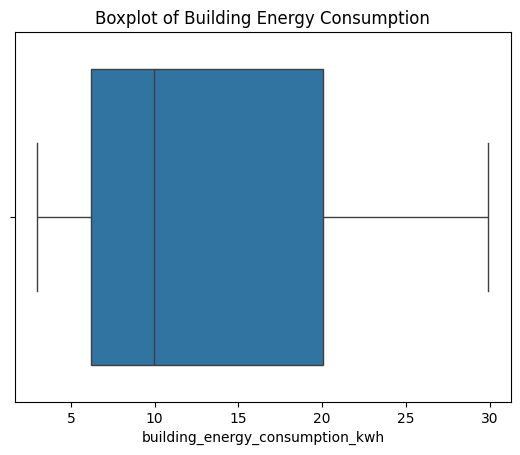

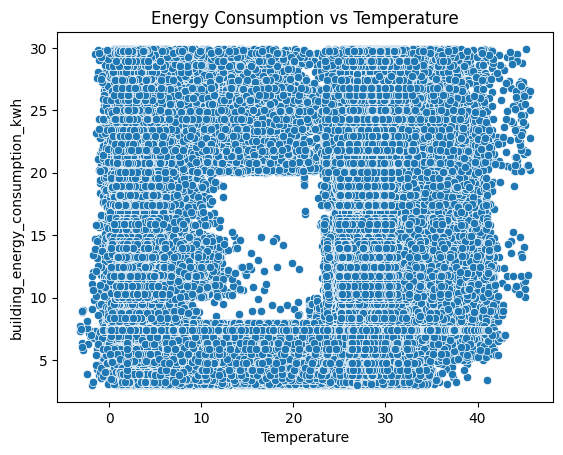

In [13]:


import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['building_energy_consumption_kwh'], bins=30, kde=True)
plt.title('Distribution of Energy Consumption')
plt.show()



# Boxplot for energy consumption
sns.boxplot(data=merged_data, x='building_energy_consumption_kwh')
plt.title('Boxplot of Building Energy Consumption')
plt.show()

# Scatterplot to observe relationships
sns.scatterplot(data=merged_data, x='Temperature', y='building_energy_consumption_kwh')
plt.title('Energy Consumption vs Temperature')
plt.show()


In [14]:
Q1 = merged_data['building_energy_consumption_kwh'].quantile(0.25)
Q3 = merged_data['building_energy_consumption_kwh'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_data[(merged_data['building_energy_consumption_kwh'] < lower_bound) | 
                       (merged_data['building_energy_consumption_kwh'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")

Number of outliers: 0


In [15]:
# Extracting useful time-based features
merged_data['hour'] = merged_data['timestamp'].dt.hour
merged_data['day_of_week'] = merged_data['timestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday
merged_data['month'] = merged_data['timestamp'].dt.month
merged_data['week_of_year'] = merged_data['timestamp'].dt.isocalendar().week
merged_data['is_weekend'] = merged_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Binary flag for weekends


In [16]:
# Interaction features
merged_data['temp_energy_interaction'] = merged_data['Temperature'] * merged_data['building_energy_consumption_kwh']
merged_data['humidity_energy_interaction'] = merged_data['RelativeHumidity'] * merged_data['building_energy_consumption_kwh']


In [17]:
# One-hot encoding for categorical features
merged_data = pd.get_dummies(merged_data, columns=['site_id', 'tags_name'], drop_first=True)


In [18]:
print(merged_data.head(100))

                   timestamp  building_energy_consumption_kwh  \
0  2024-09-25 00:00:00+00:00                         4.996654   
1  2024-09-25 00:10:00+00:00                         5.345860   
2  2024-09-25 00:20:00+00:00                         5.428626   
3  2024-09-25 00:30:00+00:00                         7.965427   
4  2024-09-25 00:40:00+00:00                         5.677612   
..                       ...                              ...   
95 2024-09-25 11:50:00+00:00                        22.448948   
96 2024-09-25 11:50:00+00:00                        22.448948   
97 2024-09-25 11:50:00+00:00                        22.448948   
98 2024-09-25 11:50:00+00:00                        22.448948   
99 2024-09-25 11:50:00+00:00                        22.448948   

    RelativeHumidity  Temperature  outside_weather_degree_celcius  hour  \
0           0.706666    21.983534                       20.287908     0   
1           0.706376    21.962386                       21.925873    

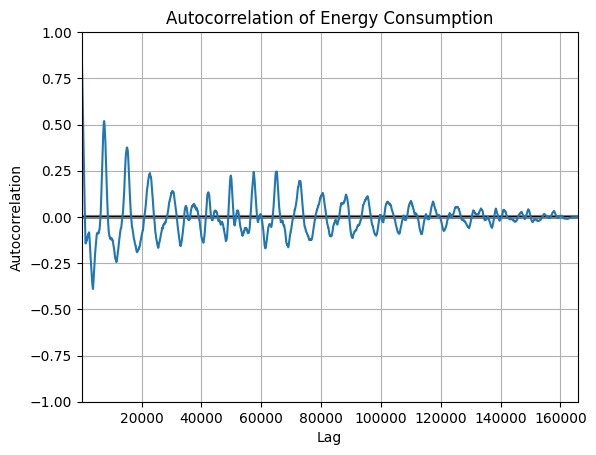

In [19]:
# Autocorrelation plot
pd.plotting.autocorrelation_plot(merged_data['building_energy_consumption_kwh'])
plt.title('Autocorrelation of Energy Consumption')
plt.show()


In [20]:
# Create lag features for the first few lags
merged_data['lag_1'] = merged_data['building_energy_consumption_kwh'].shift(1)
merged_data['lag_2'] = merged_data['building_energy_consumption_kwh'].shift(2)
merged_data['lag_3'] = merged_data['building_energy_consumption_kwh'].shift(3)

In [21]:
merged_data.head(10)



,timestamp,building_energy_consumption_kwh,RelativeHumidity,Temperature,outside_weather_degree_celcius,hour,day_of_week,month,week_of_year,is_weekend,...,site_id_DPI67244,site_id_DPID66234,"site_id_[""Unknown Area 1""]","tags_name_[""'back-area'""]","tags_name_[""'customer-area'""]","tags_name_[""'makeline'""]",tags_name_[],lag_1,lag_2,lag_3
0,2024-09-25 00:00:00+00:00,4.996654,0.706666,21.983534,20.287908,0,2,9,39,0,...,False,False,True,False,False,False,False,NaN,NaN,NaN
1,2024-09-25 00:10:00+00:00,5.345860,0.706376,21.962386,21.925873,0,2,9,39,0,...,False,False,True,False,False,False,False,4.996654,NaN,NaN
2,2024-09-25 00:20:00+00:00,5.428626,0.706307,21.957374,24.685374,0,2,9,39,0,...,False,False,True,False,False,False,False,5.345860,4.996654,NaN
3,2024-09-25 00:30:00+00:00,7.965427,0.704200,21.803741,22.018724,0,2,9,39,0,...,False,False,True,False,False,False,False,5.428626,5.345860,4.996654
4,2024-09-25 00:40:00+00:00,5.677612,0.706101,21.942295,21.976907,0,2,9,39,0,...,False,False,True,False,False,False,False,7.965427,5.428626,5.345860
5,2024-09-25 00:50:00+00:00,5.636858,0.706134,21.944763,21.145117,0,2,9,39,0,...,False,False,True,False,False,False,False,5.677612,7.965427,5.428626
6,2024-09-25 01:00:00+00:00,7.898324,0.704256,21.807805,24.314710,1,2,9,39,0,...,False,False,True,False,False,False,False,5.636858,5.677612,7.965427
7,2024-09-25 01:10:00+00:00,5.864138,0.705946,21.930998,24.859953,1,2,9,39,0,...,False,False,True,False,False,False,False,7.898324,5.636858,5.677612
8,2024-09-25 01:20:00+00:00,7.835897,0.704307,21.811585,24.860283,1,2,9,39,0,...,False,False,True,False,False,False,False,5.864138,7.898324,5.636858
9,2024-09-25 01:30:00+00:00,4.562339,0.707027,22.009837,21.213294,1,2,9,39,0,...,False,False,True,False,False,False,False,7.835897,5.864138,7.898324


In [22]:
merged_data.head(10)

,timestamp,building_energy_consumption_kwh,RelativeHumidity,Temperature,outside_weather_degree_celcius,hour,day_of_week,month,week_of_year,is_weekend,...,site_id_DPI67244,site_id_DPID66234,"site_id_[""Unknown Area 1""]","tags_name_[""'back-area'""]","tags_name_[""'customer-area'""]","tags_name_[""'makeline'""]",tags_name_[],lag_1,lag_2,lag_3
0,2024-09-25 00:00:00+00:00,4.996654,0.706666,21.983534,20.287908,0,2,9,39,0,...,False,False,True,False,False,False,False,NaN,NaN,NaN
1,2024-09-25 00:10:00+00:00,5.345860,0.706376,21.962386,21.925873,0,2,9,39,0,...,False,False,True,False,False,False,False,4.996654,NaN,NaN
2,2024-09-25 00:20:00+00:00,5.428626,0.706307,21.957374,24.685374,0,2,9,39,0,...,False,False,True,False,False,False,False,5.345860,4.996654,NaN
3,2024-09-25 00:30:00+00:00,7.965427,0.704200,21.803741,22.018724,0,2,9,39,0,...,False,False,True,False,False,False,False,5.428626,5.345860,4.996654
4,2024-09-25 00:40:00+00:00,5.677612,0.706101,21.942295,21.976907,0,2,9,39,0,...,False,False,True,False,False,False,False,7.965427,5.428626,5.345860
5,2024-09-25 00:50:00+00:00,5.636858,0.706134,21.944763,21.145117,0,2,9,39,0,...,False,False,True,False,False,False,False,5.677612,7.965427,5.428626
6,2024-09-25 01:00:00+00:00,7.898324,0.704256,21.807805,24.314710,1,2,9,39,0,...,False,False,True,False,False,False,False,5.636858,5.677612,7.965427
7,2024-09-25 01:10:00+00:00,5.864138,0.705946,21.930998,24.859953,1,2,9,39,0,...,False,False,True,False,False,False,False,7.898324,5.636858,5.677612
8,2024-09-25 01:20:00+00:00,7.835897,0.704307,21.811585,24.860283,1,2,9,39,0,...,False,False,True,False,False,False,False,5.864138,7.898324,5.636858
9,2024-09-25 01:30:00+00:00,4.562339,0.707027,22.009837,21.213294,1,2,9,39,0,...,False,False,True,False,False,False,False,7.835897,5.864138,7.898324


In [23]:
# Calculate rolling statistics (window size can be adjusted)
merged_data['rolling_mean_3'] = merged_data['building_energy_consumption_kwh'].rolling(window=3).mean()
merged_data['rolling_std_3'] = merged_data['building_energy_consumption_kwh'].rolling(window=3).std()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['building_energy_consumption_kwh', 'RelativeHumidity', 'Temperature']
merged_data[numerical_cols] = scaler.fit_transform(merged_data[numerical_cols])

In [25]:

merged_data.dropna(inplace=True)
# Define features (X) and target (y)
X = merged_data.drop(['building_energy_consumption_kwh', 'timestamp'], axis=1)  # Drop target and any irrelevant columns
y = merged_data['building_energy_consumption_kwh']


In [26]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (132591, 56)
X_test shape: (33148, 56)
y_train shape: (132591,)
y_test shape: (33148,)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

Linear Regression Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R^2 Score: 1.00


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R^2 Score: {r2_rf:.2f}")



Random Forest Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.00
R^2 Score: 1.00


In [29]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("\nSupport Vector Regressor Performance:")
print(f"Mean Squared Error (MSE): {mse_svr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"R^2 Score: {r2_svr:.2f}")



Support Vector Regressor Performance:
Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.03
R^2 Score: 0.99


In [30]:
from sklearn.model_selection import cross_val_score
svr_model = SVR(kernel='rbf')
scores = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean()}")






Cross-Validation MSE: 0.0011803651463502024


In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Perform cross-validation with 5 folds (you can change cv as needed)
cv_mse_linear = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE to positive for interpretability
cv_mse_linear_mean = -np.mean(cv_mse_linear)
print(f"Cross-Validation Mean Squared Error (MSE) for Linear Regression: {cv_mse_linear_mean:.4f}")

Cross-Validation Mean Squared Error (MSE) for Linear Regression: 0.0000


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Define parameter grid for SVR
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'epsilon': [0.01, 0.1, 1, 5],
#     'kernel': ['linear', 'poly', 'rbf']
# }

# # Initialize the SVR model
# svr_model = SVR()

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Best hyperparameters and model
# best_svr_model = grid_search.best_estimator_
# print(f"Best Parameters: {grid_search.best_params_}")


In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Predict on the test set using the best SVR model
# y_pred_svr = best_svr_model.predict(X_test)

# # Evaluate the model's performance
# mse_svr = mean_squared_error(y_test, y_pred_svr)
# mae_svr = mean_absolute_error(y_test, y_pred_svr)
# r2_svr = r2_score(y_test, y_pred_svr)

# print("\nTuned SVR Model Performance:")
# print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
# print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
# print(f"R² Score: {r2_svr:.2f}")


In [32]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Initialize and train a Ridge model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha for different regularization strength
ridge_model.fit(X_train, y_train)

# Evaluate using cross-validation
cv_mse_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_ridge_mean = -cv_mse_ridge.mean()
print(f"Cross-Validation MSE for Ridge Regression: {cv_mse_ridge_mean:.4f}")


Cross-Validation MSE for Ridge Regression: 0.0000


In [33]:
from sklearn.linear_model import Lasso

# Initialize and train a Lasso model
lasso_model = Lasso(alpha=0.1)  # Tune alpha to control regularization
lasso_model.fit(X_train, y_train)

# Evaluate using cross-validation
cv_mse_lasso = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_lasso_mean = -cv_mse_lasso.mean()
print(f"Cross-Validation MSE for Lasso Regression: {cv_mse_lasso_mean:.4f}")


Cross-Validation MSE for Lasso Regression: 0.0005


In [34]:
# Display non-zero coefficients from Lasso
important_features = X.columns[lasso_model.coef_ != 0]
print("Important Features Selected by Lasso:")
print(important_features)


Important Features Selected by Lasso:
Index(['temp_energy_interaction', 'rolling_mean_3'], dtype='object')


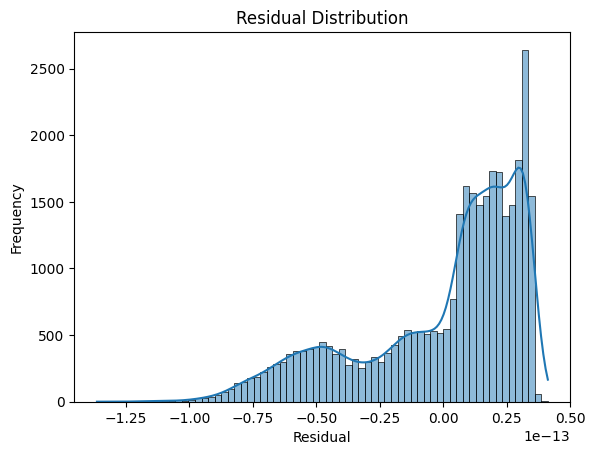

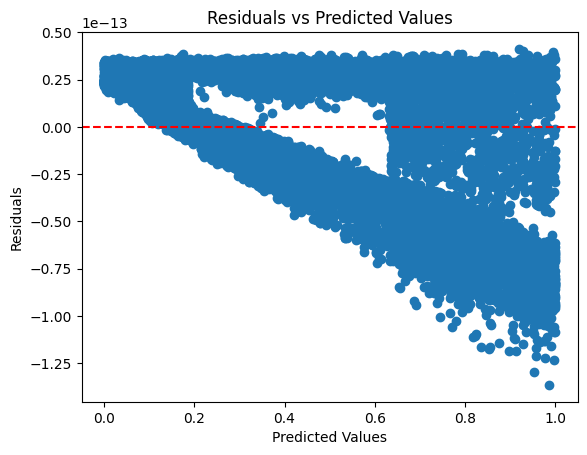

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residual histogram
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Residual vs Predicted scatter plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [36]:
from sklearn.model_selection import cross_val_score

# Cross-validation for the selected model
cv_mse_final = cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Final Cross-Validation MSE for Linear Regression: {-cv_mse_final.mean():.4f}")


Final Cross-Validation MSE for Linear Regression: 0.0000


In [37]:
from sklearn.model_selection import GridSearchCV

# Grid search for Ridge
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search_ridge = GridSearchCV(Ridge(), ridge_param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_ridge.fit(X_train, y_train)
print(f"Best alpha for Ridge: {grid_search_ridge.best_params_}")

# Grid search for Lasso
lasso_param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search_lasso = GridSearchCV(Lasso(), lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_lasso.fit(X_train, y_train)
print(f"Best alpha for Lasso: {grid_search_lasso.best_params_}")


Best alpha for Ridge: {'alpha': 0.01}
Best alpha for Lasso: {'alpha': 0.01}


In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Initialize and train a Ridge model
ridge_model = Ridge(alpha=0.01)  # You can tune alpha for different regularization strength
ridge_model.fit(X_train, y_train)

# Evaluate using cross-validation
cv_mse_ridge = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_ridge_mean = -cv_mse_ridge.mean()
print(f"Cross-Validation MSE for Ridge Regression: {cv_mse_ridge_mean:.4f}")


Cross-Validation MSE for Ridge Regression: 0.0000
